# Credit model

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div>
   <p>
  By:

    Francisco Alexander Sotomayor Pineda.
    José Pablo Jiménez Mendoza.
    Paulo Adrián Villa Domínguez.
    Camila
    Marcos Ramos
    Pablo Sanchez

  Teacher:
  
    Rodolfo Slay Ramos
   </p>
  </div>
  <div>
    <img src="https://i0.wp.com/cimtrajalisco.org/wp-content/uploads/2019/02/Logo_Horizontal-1024x472.jpg?fit=1024%2C472" alt="ITESO" width="600"/>
  </div>
</div>


In this project, we aim to develop a predictive model to determine the likelihood of loan approval based on various characteristics of loan applicants. We are using the **PS4E9 || Original Data || Loan Approval Prediction** dataset, which contains 32,581 loan applications. Each entry includes applicant details and loan-specific metrics that influence the loan approval process, such as applicant age, income, employment length, home ownership, credit history, and loan-related details like the requested loan amount, interest rate, and purpose.

#### Dataset Summary
The dataset comprises 12 features categorized as follows:

* Numerical Features: applicant age, income, employment length, loan amount, interest rate, percentage of income for loan repayment, and credit history length.
* Categorical Features: home ownership status, loan intent, loan grade, and previous default status.
* Target Variable: loan_status, which indicates whether a loan application was approved or not.


#### Objectives
Our project involves three main stages:
1. **Loading the Data**

2. **Exploratory Data Analysis (EDA)**: We’ll analyze the dataset to understand the distribution of features and relationships with loan_status, the target variable. 

    This stage includes:

    * Histograms and KDE plots to observe distributions of numeric variables.
    * Violin plots to examine numeric feature distributions segmented by loan approval status.
    * Stacked bar charts for categorical features to display category relationships with loan status.

3. **Data Preprocessing**: We’ll prepare the data for modeling by handling missing values and transforming categorical features. 

    This process will ensure that:

    * Missing values are treated according to the chosen imputation strategy.
    * Categorical variables are encoded appropriately to be utilized in our machine learning model.


4. **Modeling**: Using machine learning techniques, we’ll build a model to predict loan approval outcomes based on applicant features. This part involves:

    * Feature Engineering: Further transformations and selections to optimize model input.
    * Training and Tuning: Building an initial XGBoost model and adjusting hyperparameters to improve accuracy.
    * Evaluation: Assessing model performance using appropriate metrics (e.g., accuracy, F1 score and probability of default) to understand how well it predicts loan approval.

By the end of this project, we will have a comprehensive loan approval prediction model that can support financial institutions in making more informed lending decisions.

In [51]:
import warnings
import numpy as np
import pandas as pd
from load_data import DataLoader
from Model import LoanApprovalModel
from EDA_Preprocessing import LoanEDA
from risk_analysis import RiskAnalysis

warnings.filterwarnings("ignore")

In [64]:
# Create the loader
loader = DataLoader(filepath="credit_risk_dataset.csv")
# Load the dataset
data = loader.load_data()
# Get a summary
loader.get_data_summary()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [65]:
# Print basic info of the data
loader.get_data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


We can see that most of the variables do not have null data, except for the variables 'person_emp_length' and 'loan_int_rate', so we will have to think of some strategy for processing this data.

---

First, let's train a basic logistic regression model as a baseline so we can see the improvement later in the process.

In [66]:
# Initialize the model class
model_bm = LoanApprovalModel(data, target_column="loan_status")

# Benchmark with Logistic Regression
y_test, y_prob = model_bm.benchmark_logistic_regression()
model_bm.plot_roc_auc(y_test, y_prob)

Our initial evaluation of the loan approval prediction model shows a decent AUC score of 0.7955. This indicates that the model is reasonably good at distinguishing between approved and non-approved loans. However, there's still room for improvement.

To enhance our model, we will conduct Exploratory Data Analysis (EDA). This will help us better understand the dataset by visualizing relationships, identifying patterns, and spotting any issues.

Based on the insights gained from the EDA, we will make informed decisions on feature selection, data preprocessing, and the choice of machine learning algorithms. Our aim is to boost the model’s accuracy and effectiveness in predicting loan approvals.

Let’s move forward with the exploratory data analysis to uncover insights that will guide our model improvements.

## EDA

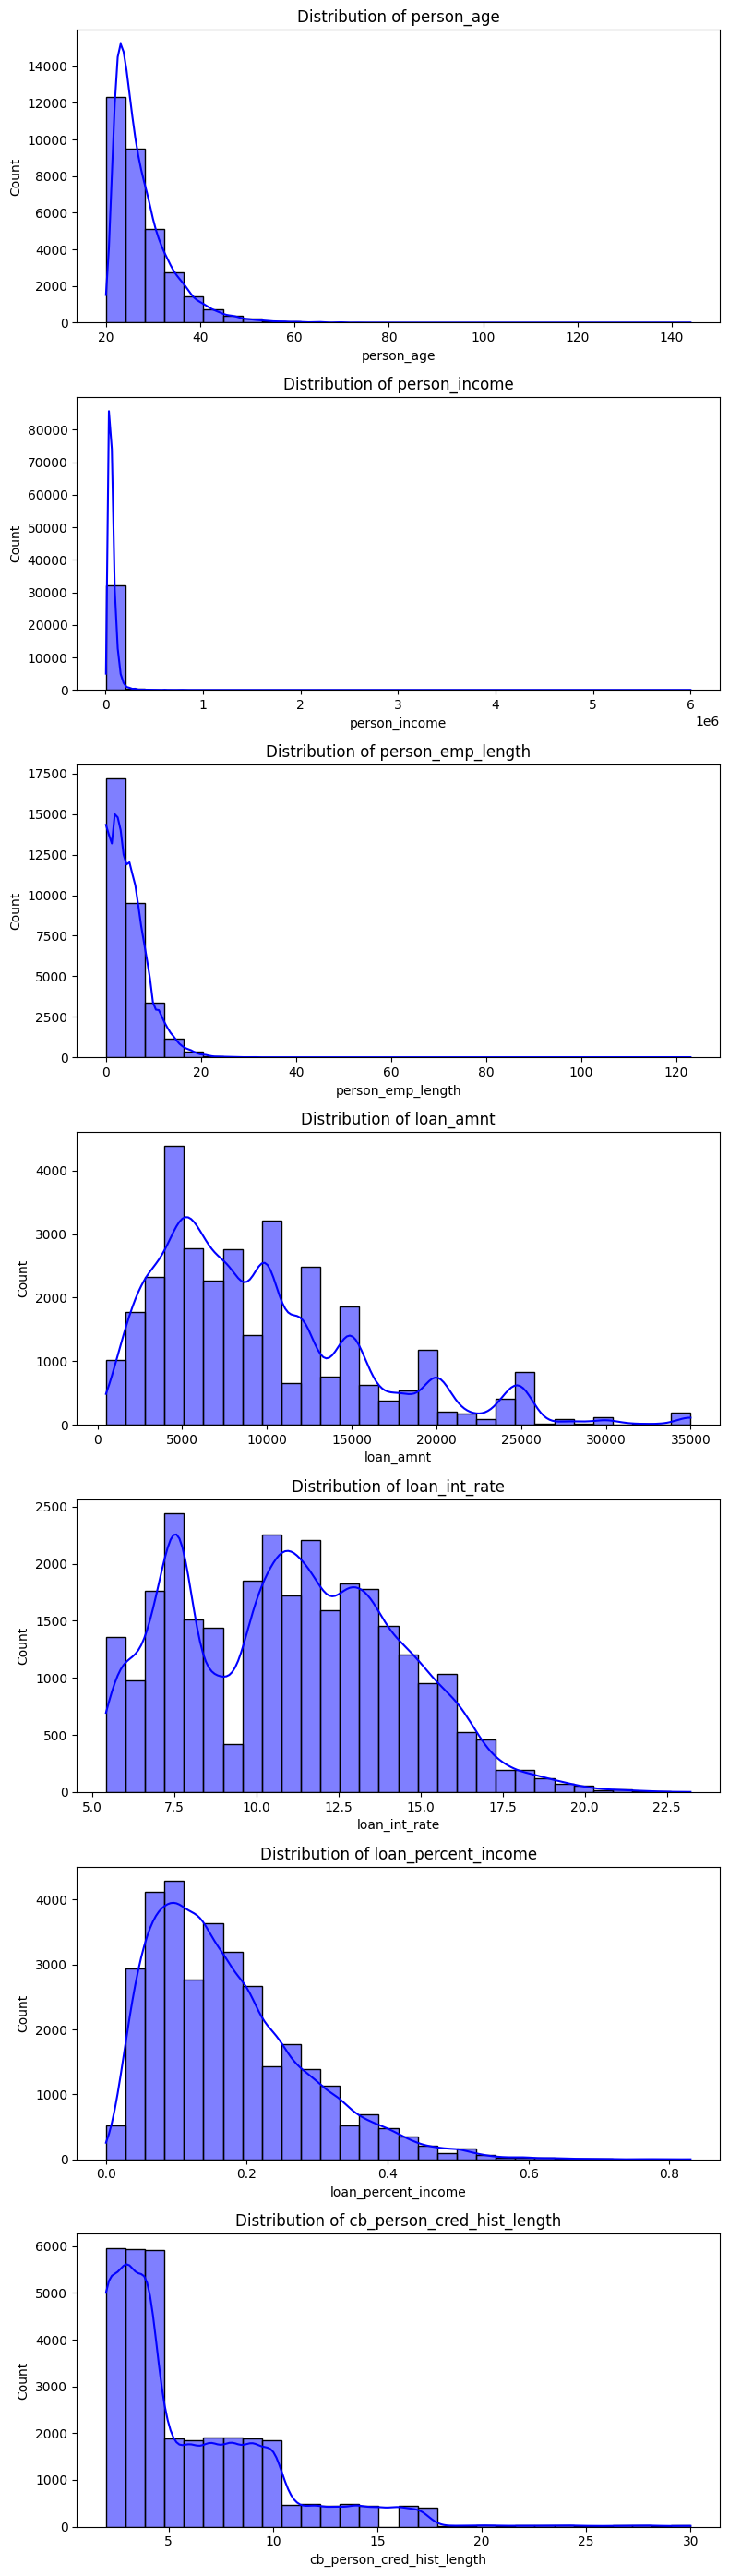

In [67]:
eda = LoanEDA(data=data, target_column="loan_status")
# Plot the distribution of the numeric variables
eda.plot_numeric_histograms()

We have a lot of outliers in some columns such as:
- person_age
- person_income
- person_emp_lenght

So we are going to replace those values with the median

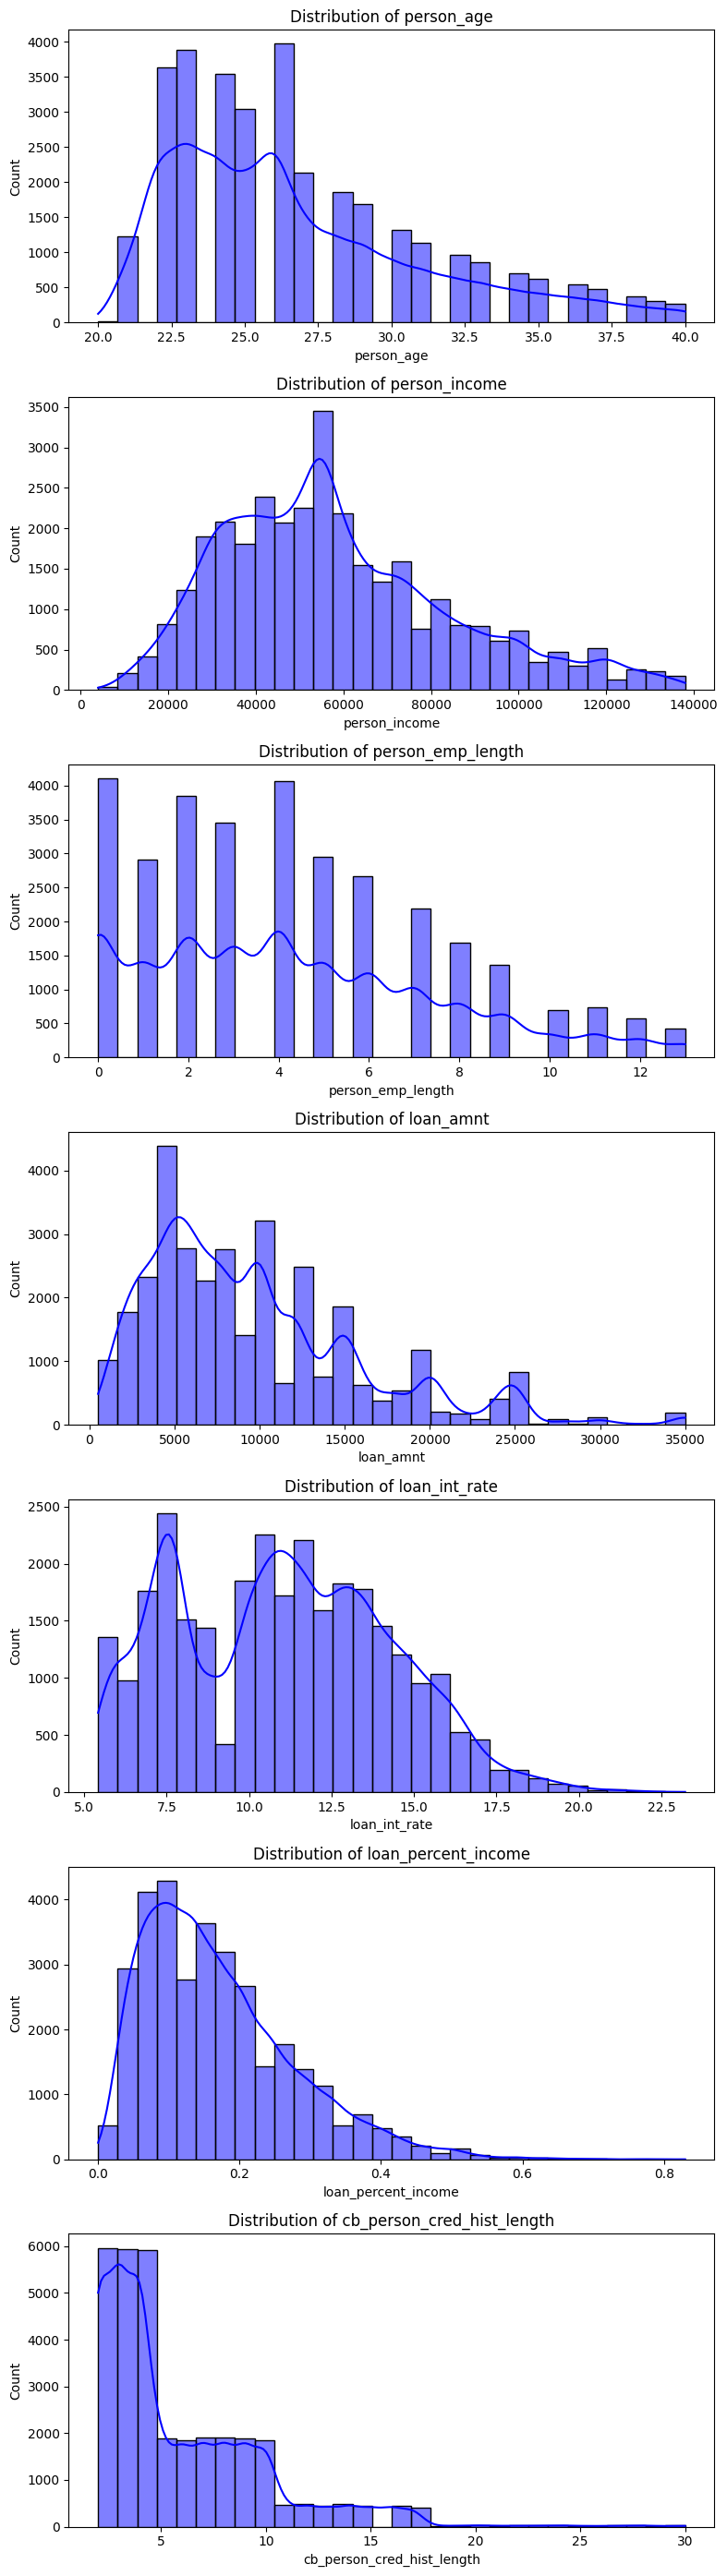

In [68]:
eda.replace_outliers(columns=["person_age", "person_income", "person_emp_length"])
eda.plot_numeric_histograms()

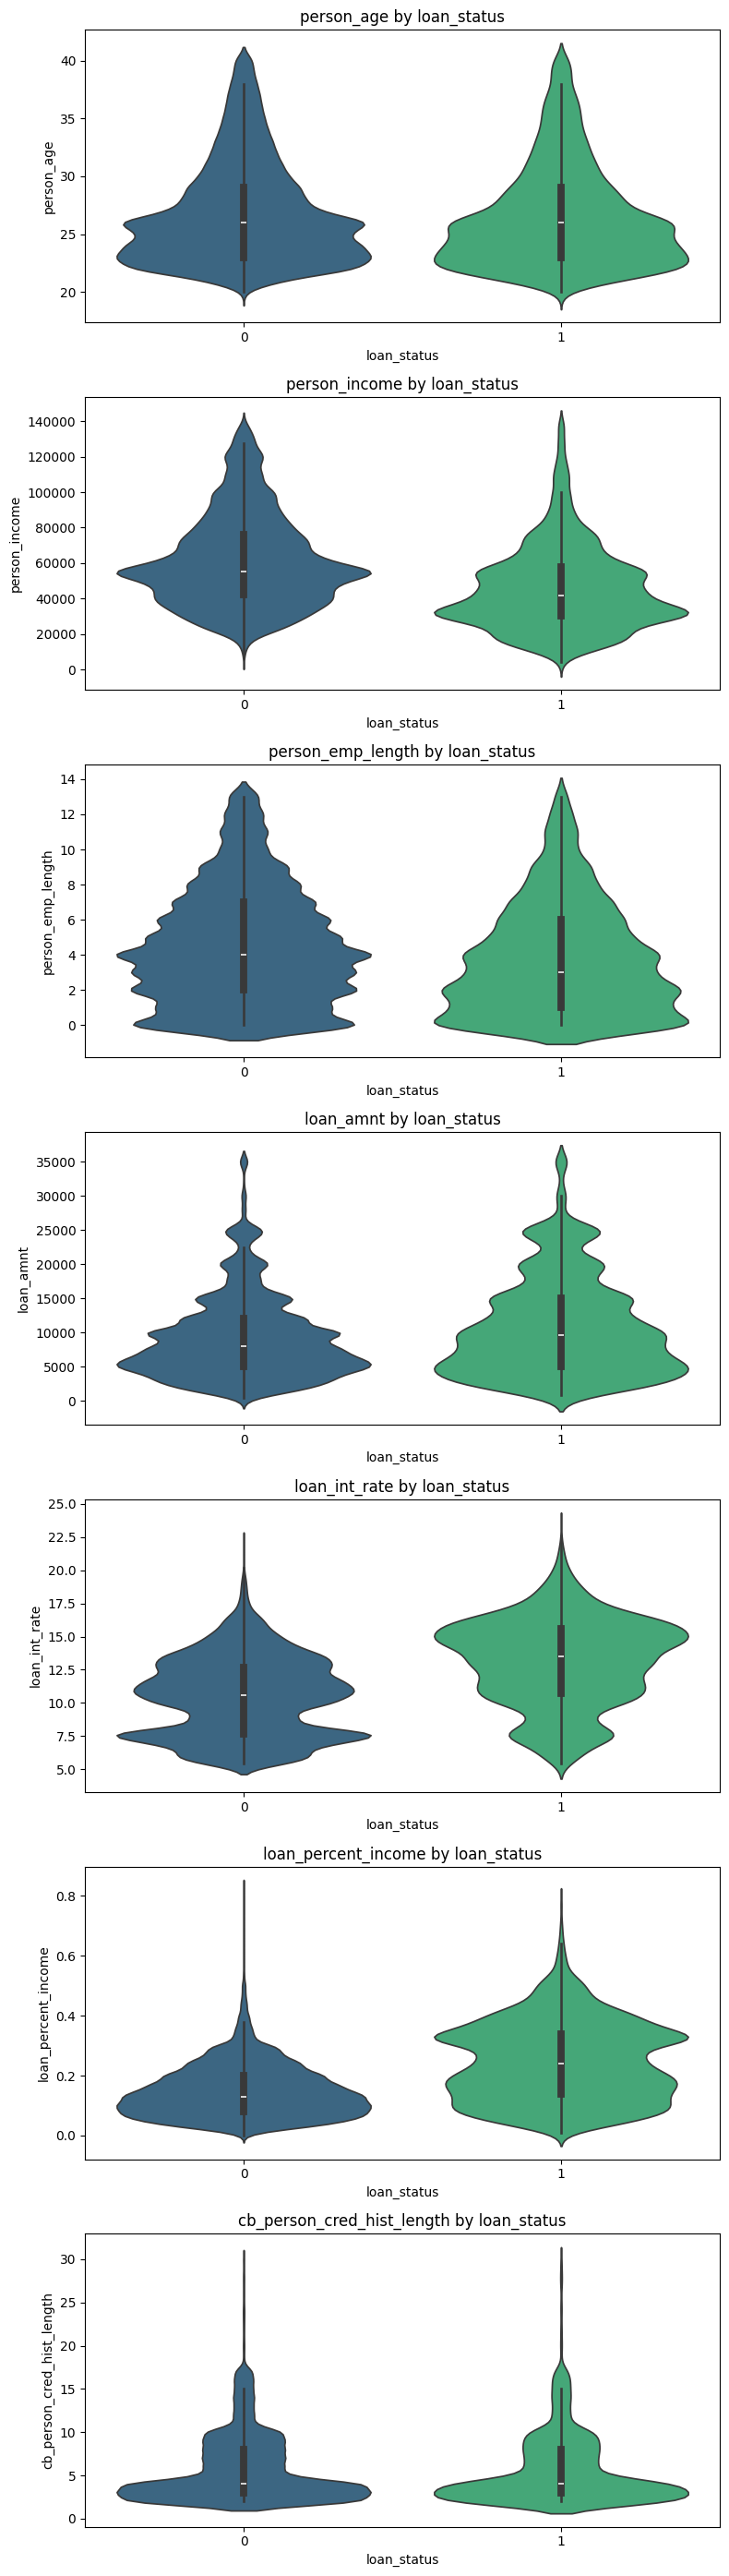

In [69]:
# Lets see some violin plots as well
eda.plot_numeric_violinplots()

The variables and their distributions have improved a lot, now we are going to fill null data with medians and see some graphs of the categorical variables.

We are skipping normalization and scaling here because boosting models like XGBoost rely on binary splits rather than on the scale of features. Tree-based models are inherently robust to unscaled data, focusing instead on creating hierarchical splits that capture feature importance naturally. This approach also helps retain the interpretability of key financial features, such as income and loan amount, which are more meaningful in their original units when assessing credit risk.

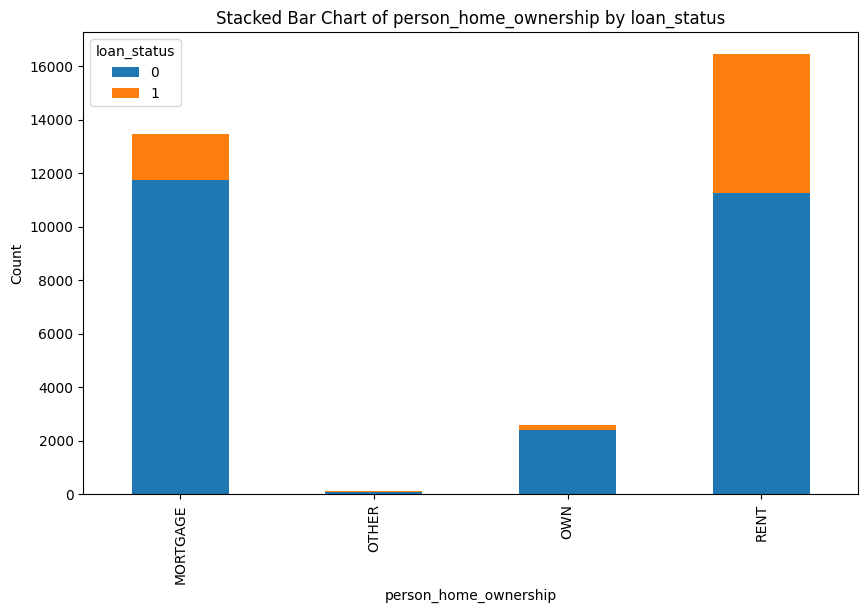

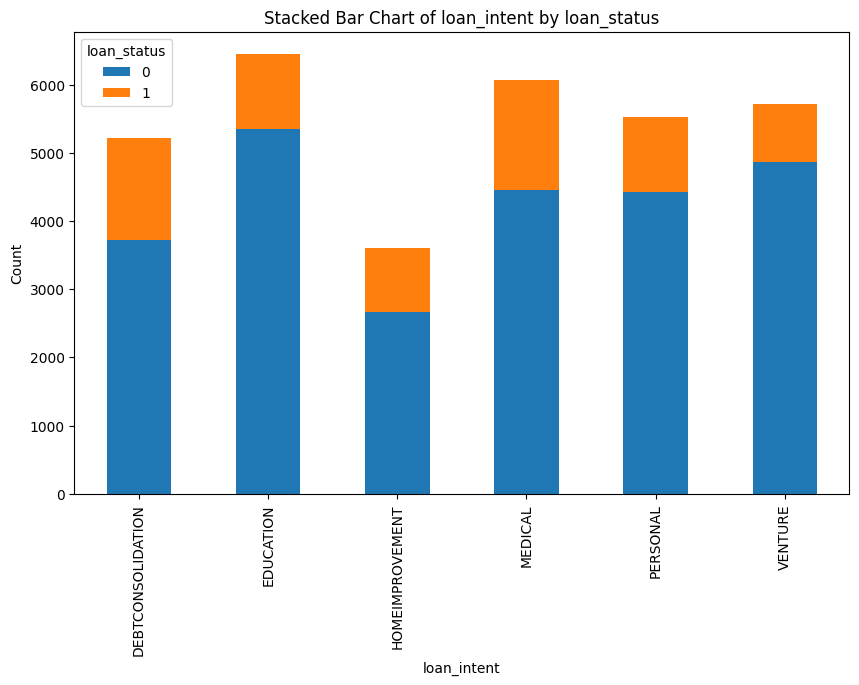

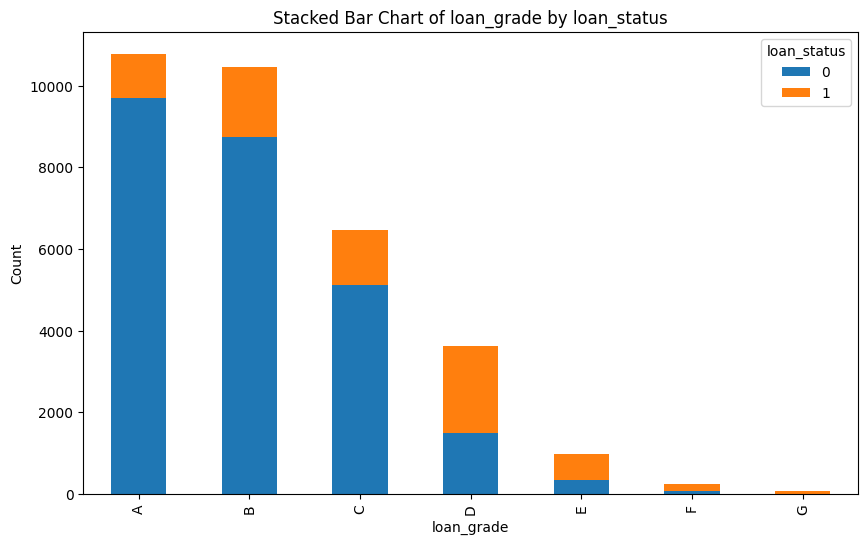

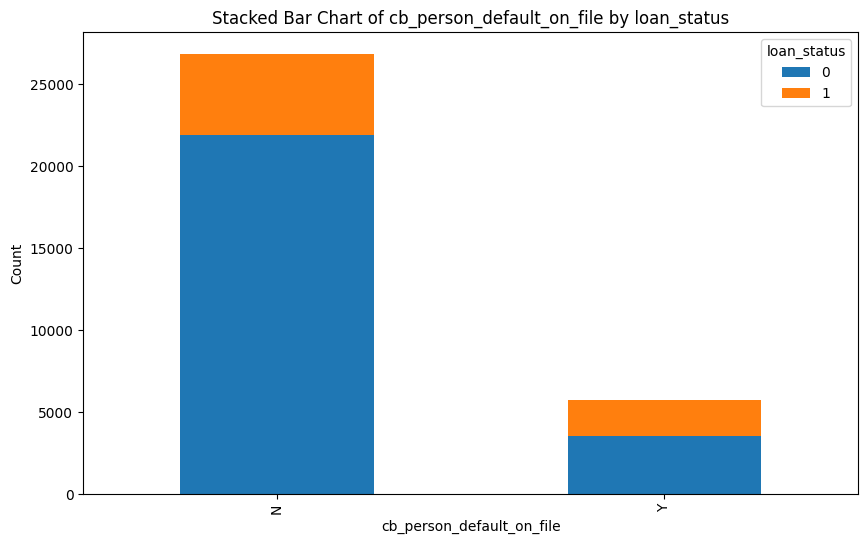

In [70]:
eda.plot_categorical_features()

In [10]:
# This function imputates the missing values with the method in the dictionary, returns the dataset with all the changes made above
data = eda.get_data_with_handled_missing_values(impute_dict={"person_emp_length":"median", "loan_int_rate":"median"})
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,4.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23.0,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24.0,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,26.0,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,26.0,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,26.0,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,26.0,55000.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Train the model with the new dataset

In [11]:
# Create an instance with the new changes and the target column
model = LoanApprovalModel(data, target_column="loan_status")
# Train the model
model.train_xgboost_model()
# Evaluate it
model.evaluate_model()

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5072
           1       0.82      0.81      0.81      1445

    accuracy                           0.92      6517
   macro avg       0.88      0.88      0.88      6517
weighted avg       0.92      0.92      0.92      6517



The model has surpassed the initial benchmark, delivering a strong performance, especially in terms of balanced precision and recall across both classes. This enhanced performance implies that the model is better suited for assessing credit risk, accurately identifying high-risk applicants while minimizing false positives in low-risk cases. Moving forward, this model could effectively support credit decision-making processes.

# Credit Risk Analysis

In [52]:
# Bring the testing dataset from out class
testing_dataset = model.X_test
# Also the encoder
transformer = model.onehot_encoder
# Transform the dummies to the real value
transformed_data = pd.DataFrame(transformer.inverse_transform(testing_dataset.iloc[:, 7:]), columns=model.categorical_features)
# Filter dummie columns
testing_dataset = testing_dataset[model.numeric_features]
testing_dataset.reset_index(inplace=True)
# Join of the transformed data with the other values
testing_dataset = pd.concat([testing_dataset, transformed_data], axis=1)
testing_dataset = testing_dataset.drop(columns="index")
# Calculate the Probability of default
testing_dataset["Prob_default"] = model.calculate_pd()
# Setting our Loss given default at 40% for analysis
testing_dataset["Loss Given Default"] = 0.4
# Calculate the risk of every row
testing_dataset["Risk Assessment"] = np.round(testing_dataset["Prob_default"] * testing_dataset["loan_amnt"] * testing_dataset["Loss Given Default"],2)
testing_dataset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,Prob_default,Loss Given Default (LGD),Risk Assessment
0,24.0,28000.0,6.0,10000,10.37,0.36,2,OWN,HOMEIMPROVEMENT,B,N,0.000088,0.4,0.35
1,27.0,64000.0,0.0,10000,15.27,0.16,10,RENT,PERSONAL,C,Y,0.498490,0.4,1993.96
2,26.0,72000.0,10.0,16000,10.99,0.22,3,MORTGAGE,EDUCATION,D,N,0.262624,0.4,1680.79
3,23.0,27996.0,7.0,10000,10.99,0.36,2,RENT,DEBTCONSOLIDATION,A,N,0.998870,0.4,3995.48
4,30.0,44500.0,2.0,13000,16.32,0.29,6,RENT,MEDICAL,E,N,0.986802,0.4,5131.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512,37.0,88000.0,4.0,9925,10.99,0.11,16,MORTGAGE,HOMEIMPROVEMENT,B,N,0.493074,0.4,1957.50
6513,26.0,64000.0,2.0,3000,10.99,0.05,4,RENT,MEDICAL,A,N,0.457590,0.4,549.11
6514,23.0,114000.0,4.0,10000,10.99,0.09,2,MORTGAGE,PERSONAL,B,N,0.157775,0.4,631.10
6515,24.0,100000.0,1.0,6000,10.99,0.06,3,MORTGAGE,DEBTCONSOLIDATION,A,N,0.035353,0.4,84.85


Lets analyze the outputs given by the model

In [54]:
# Create an instance of the class with the DataFrame
risk_analysis = RiskAnalysis(testing_dataset)

The Probability of Default (PD) distribution allows us to understand the likelihood of borrowers defaulting on their loans within our portfolio. A higher concentration at the lower end of PD would suggest most borrowers are low-risk, while a more even distribution across PD values could indicate a range of credit profiles within the dataset.

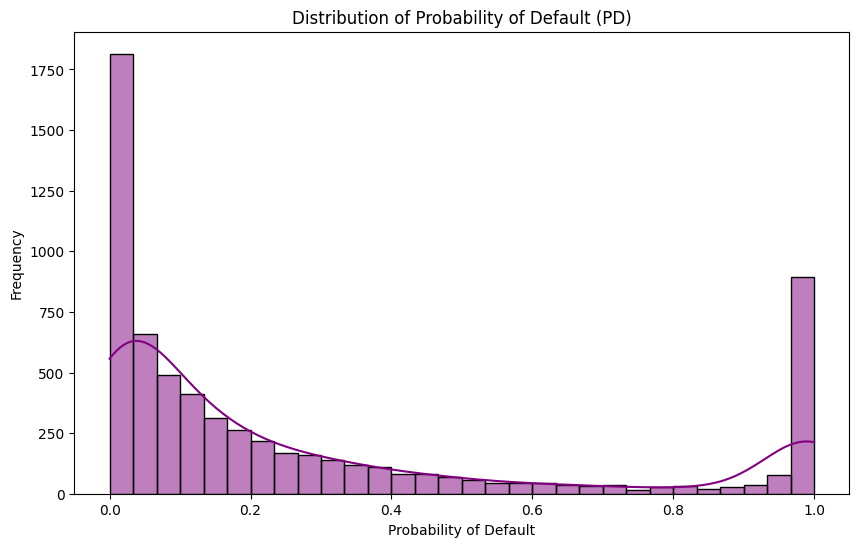

In [55]:
risk_analysis.plot_pd_distribution()

To gain insight into how risk varies across different segments, we analyze the distribution of Risk Assessment by categories like loan grade. These segments help identify groups that might carry higher risk levels, which could inform targeted risk mitigation strategies.

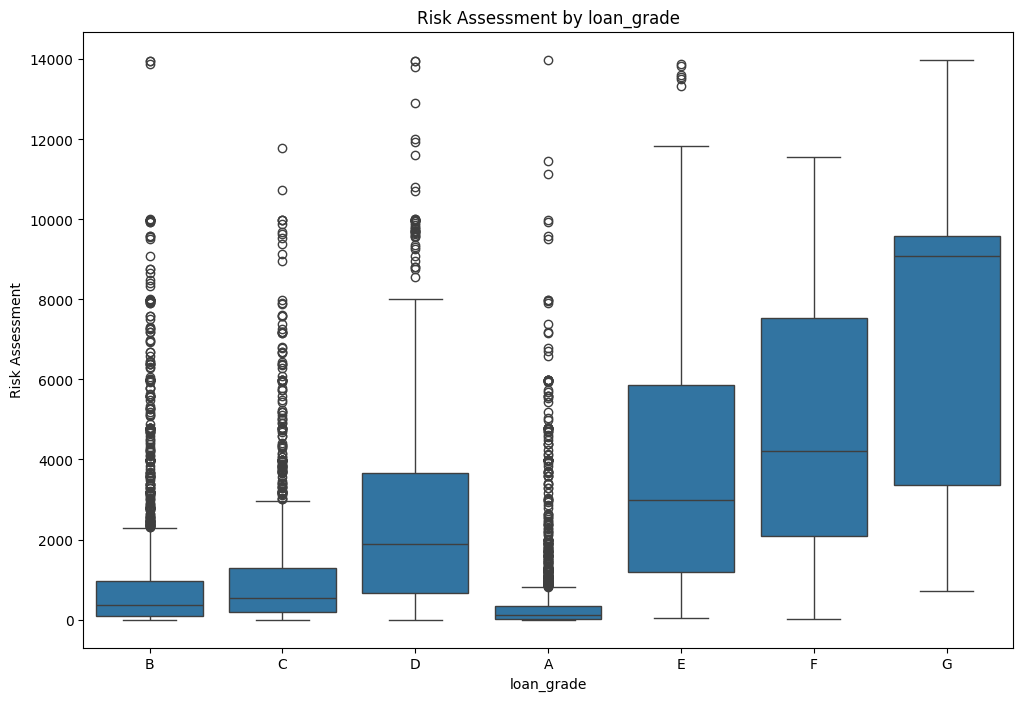

In [63]:
risk_analysis.plot_risk_by_category('loan_grade')

The Risk Concentration Curve, or Lorenz Curve, shows the cumulative proportion of risk relative to the cumulative proportion of applicants. A steep curve would indicate that a small percentage of applicants are responsible for a large portion of the risk. In contrast, a closer-to-diagonal line would suggest a more even risk distribution.

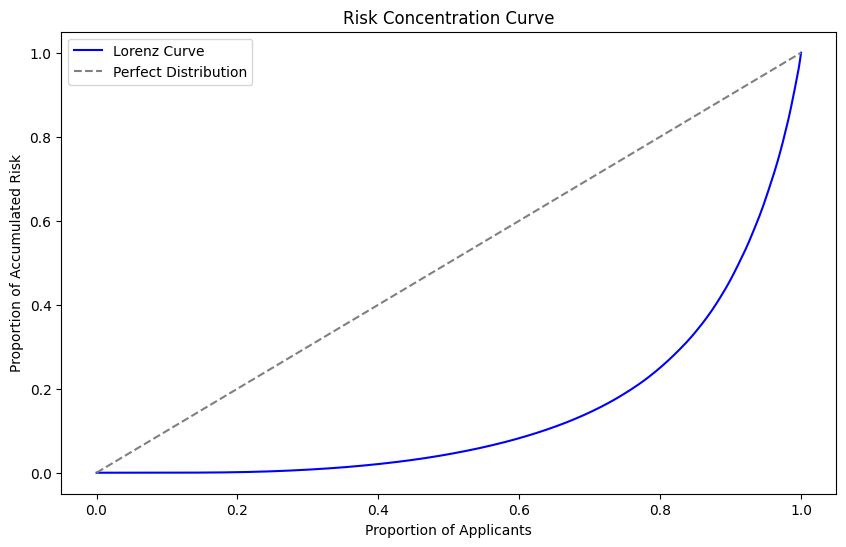

In [57]:
risk_analysis.plot_risk_concentration_curve()

This analysis breaks down the average Risk Assessment by income range. Understanding how risk varies with income levels allows us to spot trends and potential vulnerabilities within certain income groups, enabling tailored adjustments to our credit risk models.

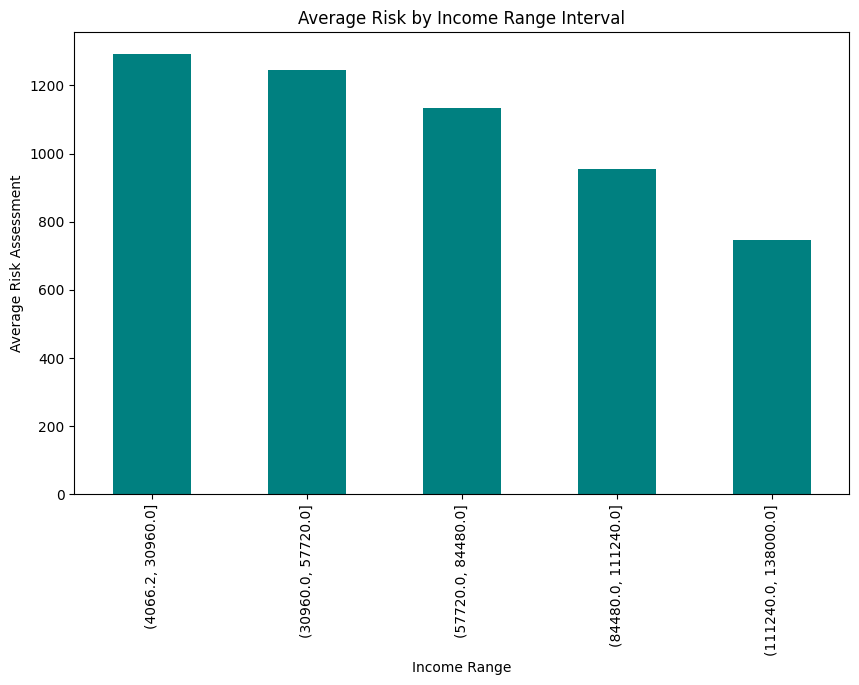

In [59]:
risk_analysis.plot_risk_by_income_range()

The Total Portfolio Risk represents the sum of individual risks across all applicants in the portfolio. This metric provides an overall view of potential risk exposure, serving as a benchmark for further risk mitigation efforts and portfolio adjustments.

In [60]:
risk_analysis.calculate_total_portfolio_risk()

Total Portfolio Risk: $7,597,802.16


In this project, we developed a robust machine learning pipeline to predict loan approval and assess credit risk. Our workflow began with a detailed exploration and preprocessing of the data, ensuring that missing values, outliers, and categorical variables were addressed to make the data ready for effective modeling. A baseline Logistic Regression model established initial performance benchmarks, showing promising predictive potential. Building on this, we implemented an XGBoost model tailored to handle imbalances in the dataset and achieve higher predictive accuracy.

Beyond classification, we integrated a credit risk assessment framework to calculate key risk metrics, including Probability of Default (PD) and Loss Given Default (LGD), which quantify the applicant's risk profile. Visualizations of these metrics allowed for a more in-depth analysis, revealing insights into risk distribution across applicant demographics and loan details. This dual approach—predictive modeling and risk quantification—created a comprehensive solution, capable of supporting data-driven decision-making in loan and credit risk management.